In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve

from mypackage import dir

smote = SMOTE(random_state=42)
iso_forest = IsolationForest(contamination=0.1, random_state=42)

In [2]:
# Environment variables
project = 'british'
data = dir.make_dir(project) 
raw = data('raw')
processed = data('processed')
outputs = data('outputs')

In [3]:
# Función para cargar datos
def cargar_datos(table_name: str) -> pd.DataFrame:
    df = pd.read_parquet(processed / f'{table_name}.parquet.gzip')
    print(f'Loaded table: {table_name}')
    return df

In [4]:
# Identificar columnas
numeric_features = ['tenure', 'total_amount', 'numero_inversiones']
categorical_features = ['session', 'tecnología_y_software', 'country']

In [5]:
df = cargar_datos('dataset')
df['status'] = df['status'].astype('int')
df = df.loc[:,['tenure', 'total_amount', 'numero_inversiones', 
               'session', 'tecnología_y_software', 'country',
               'status']]

# Eliminar atipicos
df['anomaly'] = iso_forest.fit_predict(df)
df = df[df['anomaly'] == 1].drop(columns='anomaly')
df.head()

Loaded table: dataset


,tenure,total_amount,numero_inversiones,session,tecnología_y_software,country,status
646,6,15000,1,0,0.0,14,0
666,6,3000000,1,1,0.0,12,0
217,5,0,0,0,0.0,12,0
635,7,0,0,0,0.0,14,0
160,7,500000,1,1,0.0,14,0


In [6]:
# Definir variables y objetivo
X = df.drop('status', axis=1)  
y = df['status']

In [7]:
# Balancear clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [8]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [9]:
# Entrenar modelo
model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [10]:
# Predecir probabilidades
y_probs = model.predict_proba(X_test)[:, 1]

In [11]:
# Ajustar umbral para mejorar recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

In [12]:
# optimal_threshold = thresholds[recall > 0.7][-1] 
y_pred = (y_probs >= 0.711904761904762).astype(int)

In [13]:
# Evaluar modelo
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Recall: 0.912621359223301
Matriz de Confusión:
 [[83  0]
 [ 9 94]]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10164\44384164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


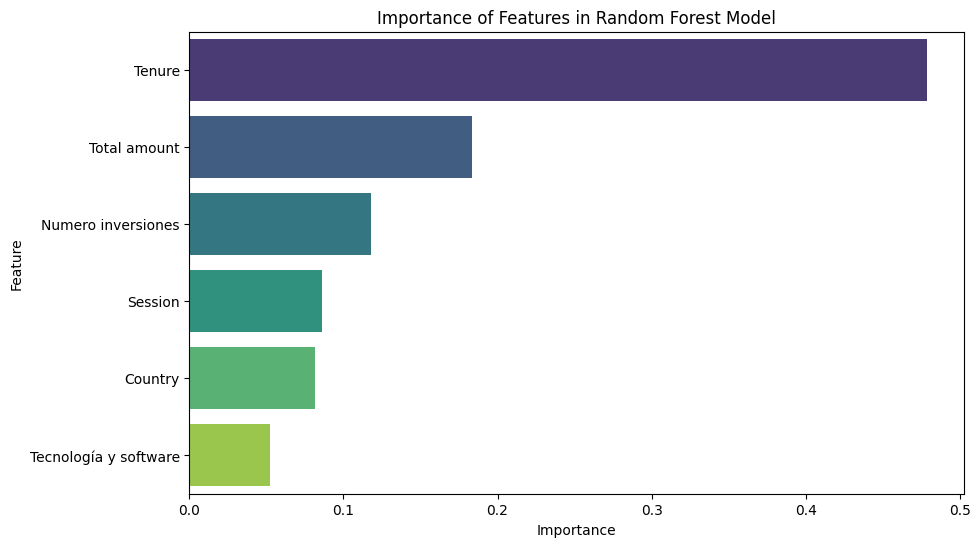

In [14]:
# Obtener la importancia de las variables
importances = model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar la importancia de las variables
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Feature'] = importance_df['Feature'].str.replace('_', ' ').str.capitalize()


# Graficar la importancia de las variables con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importance of Features in Random Forest Model')
plt.show();

In [15]:
new_data = {
    'tenure': [8],
    'total_amount': [1200000],
    'numero_inversiones': [0],    
    'session': ['1'],
    'tecnología_y_software': ['0'],
    'country': ['12'],
}
new_data = pd.DataFrame(new_data)

y_pred_new = model.predict(new_data)
y_pred_new

array([1])

In [16]:
new_data = {
    'tenure': [7],
    'total_amount': [0],
    'numero_inversiones': [0],    
    'session': ['1'],
    'tecnología_y_software': ['0'],
    'country': ['12'],
}
new_data = pd.DataFrame(new_data)

y_pred_new = model.predict(new_data)
y_pred_new

array([0])

In [20]:
print('ok_')

ok_
